# Image to Numpy Array

This code is to convert and save the 40,000 images for emotion calssification into numpy arrays.

This is for easy access and loading.

## Import Relevant Image Libraries

In [8]:
import os
from PIL import Image
import numpy as np
import joblib  # Import joblib for saving and loading images
import matplotlib.pyplot as plt

## Convert images to numpy array and Store in a List

### Splitting the image to train and test lists

In [3]:
#Directory containing the images
image_dir = "C:/Users/jcasu/Documents/CSDP 619/Facial Images"

#List to store images

images_train = []
images_test =  []
#images_train = [["Images", "Target"]]
#images_test = [["Images", "Target"]]

# Loop through the files in the directory
for train_test_filename in os.listdir(image_dir): #options are train or test
  for emotion_filename in os.listdir(os.path.join(image_dir, train_test_filename)): #options are angry, disgust, fear, happy, neutrakl, sad, surprise
    for img in os.listdir(os.path.join(image_dir, train_test_filename, emotion_filename)):# This is the image
        
      if img.endswith('.jpg') or img.endswith('.jpeg'):  # Check for JPG/JPEG files
          img_path = os.path.join(image_dir, train_test_filename, emotion_filename, img)
          img = Image.open(img_path).convert('L')  # Convert to grayscale
          img = img.resize((48, 48))  # Resize to uniform size (e.g., 48x48)

          if train_test_filename == 'train':
            images_train.append([np.array(img), str(emotion_filename)])  # Convert image to array and append to the list
          elif train_test_filename == 'test':
            images_test.append([np.array(img), str(emotion_filename)])  # Convert image to array and append to the list
print("DONE")

DONE


In [4]:
print(f'Loaded {len(images_train)} train images')

#Display the shape of the loaded images
print(f'Loaded {len(images_train + images_test)} images')

joblib.dump(images_train, 'cached_img_train.pkl')
joblib.dump(images_test, 'cached_img_test.pk1')

Loaded 28709 train images
Loaded 35887 images


['cached_img_test.pk1']

In [5]:

print(f'Loaded {len(images_train)} images')
print(f'Loaded {len(images_test)} images')


Loaded 28709 images
Loaded 7178 images


In [12]:
# Load the cached images dataset
cached_img_train = joblib.load('cached_img_train.pkl')
cached_img_test = joblib.load('cached_img_test.pk1')

# Checking the unit data in the dataset
print(f'Loaded cached images of shape {cached_img_train[2][0].shape}')
print(f'Target of the image = {cached_img_train[2][1]}')

Loaded cached images of shape (48, 48)
Target of the image = angry


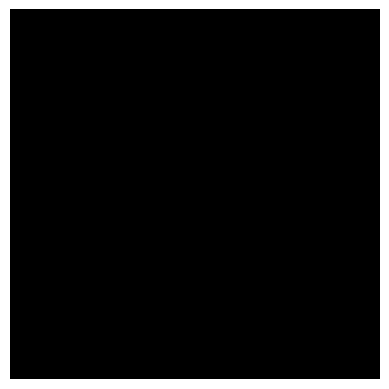

In [11]:
#Display the first image in train images
plt.imshow(cached_img_train[2][0], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()